<h3>Handling Time Series Data with Pandas</h3>

In [32]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
dates = pd.date_range(start='1/1/2021', end='6/30/2021')
len(dates)

181

In [34]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [35]:
date_df = pd.DataFrame(dates, columns=['Date'])
date_df['Temperature'] = np.random.randint(0, 50, size=(len(dates)))
date_df.head(30)

,Date,Temperature
0,2021-01-01,38
1,2021-01-02,29
2,2021-01-03,23
3,2021-01-04,32
4,2021-01-05,5
5,2021-01-06,19
6,2021-01-07,38
7,2021-01-08,14
8,2021-01-09,42
9,2021-01-10,19


In [36]:
date_df['Date'] = pd.to_datetime(date_df['Date'])
date_df = date_df.set_index('Date')

date_df.head(30)

,Temperature
Date,
2021-01-01,38
2021-01-02,29
2021-01-03,23
2021-01-04,32
2021-01-05,5
2021-01-06,19
2021-01-07,38
2021-01-08,14
2021-01-09,42


In [37]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

<Axes: xlabel='Date'>

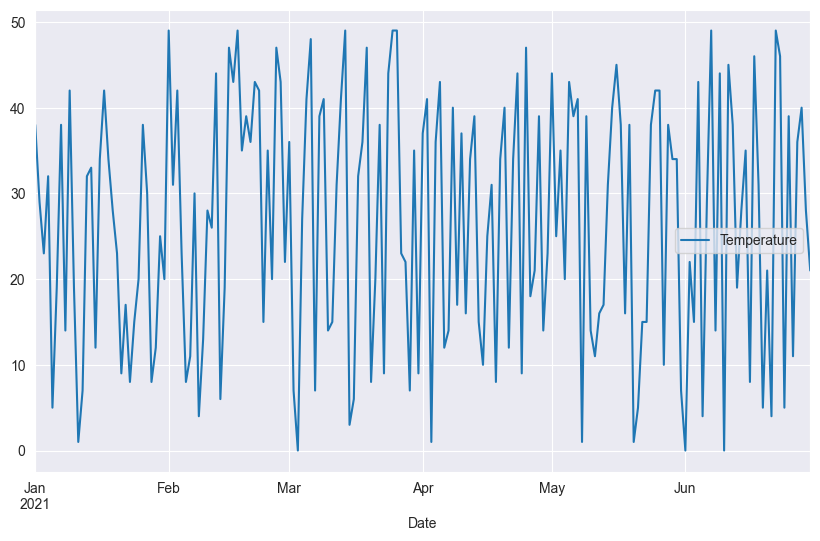

In [38]:
date_df.plot.line(y='Temperature')

<p>Time Resampling and Shifting</p>

In [39]:
google_stock = pd.read_csv('./data_sets/google_data.csv')
google_stock.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
6,2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211782
7,2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196798
8,2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917877
9,2004-09-01,51.401402,51.536537,49.884884,50.175175,50.175175,9138253


<Axes: xlabel='Date'>

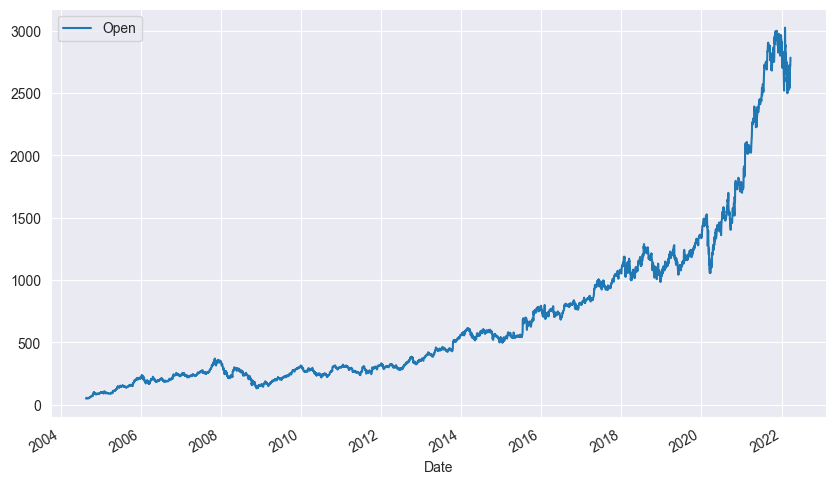

In [40]:
google_stock['Date'] = google_stock['Date'].apply(pd.to_datetime)
google_stock.set_index('Date', inplace=True)
google_stock.plot.line(y='Open')

<p>Time Sampling with Pandas</p>

In [41]:
google_stock.resample(rule='A').mean()

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_10908\1077747467.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  google_stock.resample(rule='A').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,75.791855,77.427480,74.550881,75.976614,75.976614,1.813565e+07
2005-12-31,139.004739,140.639071,137.290088,139.018562,139.018562,2.135695e+07
2006-12-31,206.155438,208.419296,203.364480,205.798448,205.798448,1.696810e+07
2007-12-31,269.683608,272.360707,266.764753,269.644864,269.644864,1.086714e+07
2008-12-31,233.369932,237.408059,228.564869,232.658667,232.658667,1.263058e+07
2009-12-31,219.704962,222.216045,217.452512,220.064231,220.064231,7.011298e+06
2010-12-31,268.424416,270.744831,265.659627,268.079627,268.079627,6.353451e+06
2011-12-31,284.870722,287.470307,282.086252,284.771855,284.771855,6.150283e+06
2012-12-31,321.716956,324.462722,318.796357,321.729969,321.729969,5.203541e+06


In [42]:
google_stock.resample(rule='M').mean()

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_10908\2747486900.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  google_stock.resample(rule='M').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-31,52.752196,54.053499,51.578245,52.683795,52.683795,1.484521e+07
2004-09-30,56.044616,57.517756,55.534106,56.670241,56.670241,1.011884e+07
2004-10-31,76.321559,78.349063,74.764288,76.692168,76.692168,2.445817e+07
2004-11-30,89.172029,91.070594,87.169550,88.836454,88.836454,2.641110e+07
2004-12-31,90.789198,92.091636,89.852352,90.975975,90.975975,1.319972e+07
...,...,...,...,...,...,...
2021-11-30,2944.850946,2966.002360,2913.110003,2935.132871,2935.132871,1.448519e+06
2021-12-31,2902.532726,2928.360918,2872.189564,2903.024092,2903.024092,1.408395e+06
2022-01-31,2725.372998,2763.125989,2684.676001,2719.239014,2719.239014,1.918015e+06


In [43]:
google_stock['Open'].resample('A').mean()

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_10908\2181244761.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  google_stock['Open'].resample('A').mean()


Date
2004-12-31      75.791855
2005-12-31     139.004739
2006-12-31     206.155438
2007-12-31     269.683608
2008-12-31     233.369932
2009-12-31     219.704962
2010-12-31     268.424416
2011-12-31     284.870722
2012-12-31     321.716956
2013-12-31     442.252351
2014-12-31     568.959666
2015-12-31     620.044801
2016-12-31     763.651865
2017-12-31     939.454622
2018-12-31    1122.564423
2019-12-31    1190.177697
2020-12-31    1477.669486
2021-12-31    2482.910911
2022-12-31    2713.341407
Freq: YE-DEC, Name: Open, dtype: float64

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_10908\1495097170.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  google_stock.Open.resample('A').mean().plot(kind='bar')


<Axes: xlabel='Date'>

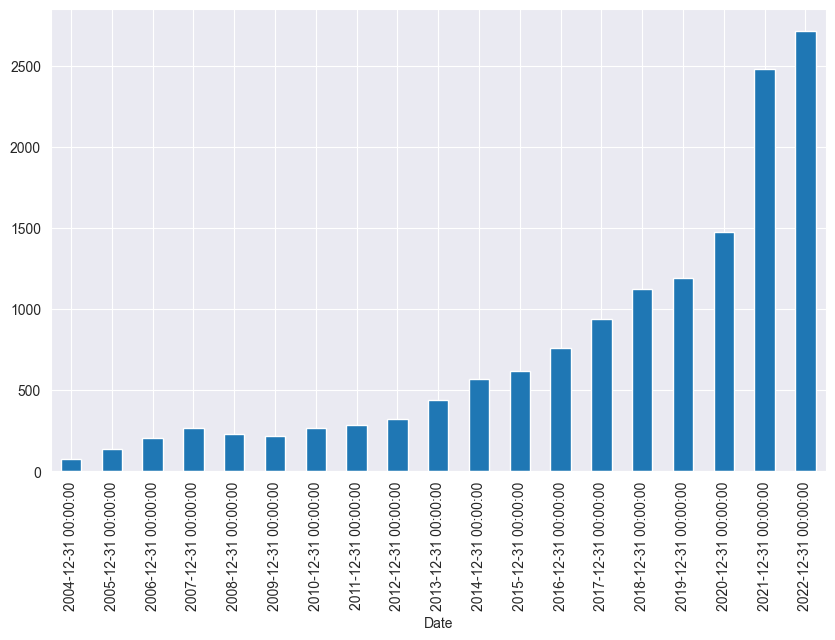

In [44]:
google_stock.Open.resample('A').mean().plot(kind='bar')

C:\Users\JohnWork\AppData\Local\Temp\ipykernel_10908\3429555649.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  google_stock.Open.resample('A').mean().plot(kind='line')


<Axes: xlabel='Date'>

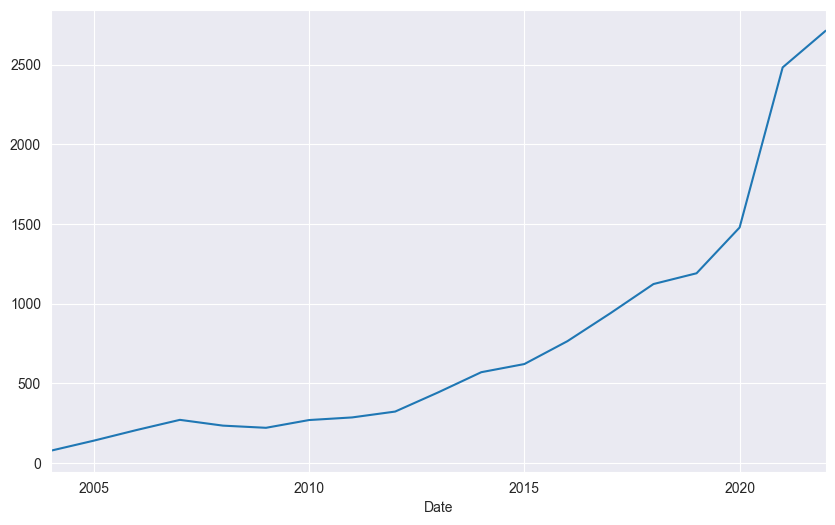

In [45]:
google_stock.Open.resample('A').mean().plot(kind='line')

<p>Time Shifting with Pandas</p>

In [46]:
google_stock.shift(3).head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-25,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-26,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-27,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0
2004-08-30,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0
2004-08-31,52.527527,54.029030,52.382381,54.009010,54.009010,7094898.0


In [47]:
google_stock.shift(-3).tail(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-10,2751.409912,2762.169922,2716.429932,2732.169922,2732.169922,1334000.0
2022-02-11,2732.929932,2761.719971,2698.479980,2754.760010,2754.760010,1251100.0
2022-02-14,2724.860107,2742.270020,2649.570068,2650.780029,2650.780029,1947500.0
2022-02-15,2669.340088,2681.399902,2603.929932,2608.060059,2608.060059,2281000.0
2022-02-16,2596.760010,2643.610107,2564.469971,2596.270020,2596.270020,2249500.0
2022-02-17,2632.969971,2641.020020,2550.550049,2551.760010,2551.760010,1639300.0
2022-02-18,2499.070068,2660.000000,2499.070068,2653.820068,2653.820068,2722800.0
2022-02-22,2671.040039,2705.429932,2635.030029,2689.189941,2689.189941,1820300.0
2022-02-23,2661.000000,2715.030029,2651.850098,2701.139893,2701.139893,1939400.0


<p>Rolling Window Functions</p>

In [48]:
google_stock.head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
2004-08-27,54.104103,54.364365,52.897900,53.128128,53.128128,6211782
2004-08-30,52.692692,52.797798,51.056057,51.056057,51.056057,5196798
2004-08-31,51.201202,51.906906,51.131130,51.236237,51.236237,4917877


In [50]:
google_stock['Date'] = pd.to_datetime(google_stock['Date'])

KeyError: 'Date'